<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [62]:
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [63]:
# url = 'https://drive.google.com/file/d/1cDiZ426T7p3WY08aZXHfxJoz443YXvbq/view?usp=sharing'
# new_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
# df = pd.read_csv(new_url, on_bad_lines = 'skip')
# df

In [64]:
df_uber = pd.read_csv("D:/02_DATA/02_MINDX/01_MODULE_2/BUOI_5/UberRequestData.csv")
# Verify shapes
print("Data Shape:", df_uber.shape)

Data Shape: (6745, 6)


In [65]:
# Display few rows of each dataset
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [66]:
# Display information about the DataFrames
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [67]:
# Value của Request timestamp và Drop timestamp đang không có consistency nên cần ép kiểu về cùng 1 định dạng.
df_uber["Request timestamp"] = pd.to_datetime(df_uber["Request timestamp"], format="mixed")
df_uber["Drop timestamp"] = pd.to_datetime(df_uber["Drop timestamp"], format="mixed")

In [68]:
df_uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


In [69]:
# Get the summary info of data set
def table_summary(df):
    print(f"Dataset shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"])
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[['Name','dtypes']]
    summary["Missing value"] = df.isnull().sum().values
    summary["Missing value %"] = 100 * np.round(df.isnull().sum().values / len(df), 2)
    summary["Duplicate value"] = df.duplicated().sum()
    summary["Duplicate value %"] = 100 * np.round(df.duplicated().sum() / len(df), 2)
    summary['Uniques'] = df.nunique().values
    return summary

In [70]:
table_summary(df_uber)

Dataset shape: (6745, 6)


,Name,dtypes,Missing value,Missing value %,Duplicate value,Duplicate value %,Uniques
0,Request id,int64,0,0.0,0,0.0,6745
1,Pickup point,object,0,0.0,0,0.0,2
2,Driver id,float64,2650,39.0,0,0.0,300
3,Status,object,0,0.0,0,0.0,3
4,Request timestamp,datetime64[ns],0,0.0,0,0.0,5618
5,Drop timestamp,datetime64[ns],3914,58.0,0,0.0,2598


In [71]:
new_cols = []
for col in df_uber.columns:
    new_cols.append(col.lower().replace(" ", "_"))
df_uber.columns = new_cols

In [72]:
table_summary(df_uber)

Dataset shape: (6745, 6)


,Name,dtypes,Missing value,Missing value %,Duplicate value,Duplicate value %,Uniques
0,request_id,int64,0,0.0,0,0.0,6745
1,pickup_point,object,0,0.0,0,0.0,2
2,driver_id,float64,2650,39.0,0,0.0,300
3,status,object,0,0.0,0,0.0,3
4,request_timestamp,datetime64[ns],0,0.0,0,0.0,5618
5,drop_timestamp,datetime64[ns],3914,58.0,0,0.0,2598


##  VẼ 1 BAR CHART ĐẾM SỐ LƯỢNG REQUEST THEO CÁC NGÀY TRONG TUẦN (T2, T3, ..., CN)?

In [73]:
df_uber["request_day_of_week"] = df_uber["request_timestamp"].dt.day_name()

In [74]:
request_count = df_uber["request_day_of_week"].value_counts()\
    .reindex(["Monday", "Wednesday", "Thursday", "Friday"])
request_count

request_day_of_week
Monday       1367
Wednesday    2644
Thursday     1353
Friday       1381
Name: count, dtype: int64

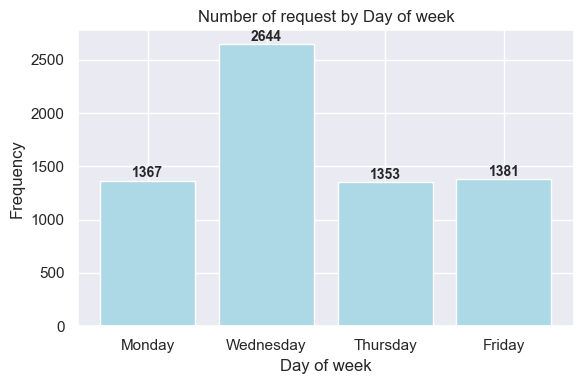

In [75]:
# Cách 1:
plt.figure(figsize=(6, 4))
bars = plt.bar(x = request_count.index, height=request_count.values, color="lightblue")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             str(int(bar.get_height())),
             ha="center", va="bottom", fontsize=10, weight="bold")
plt.title(f"Number of request by Day of week")
plt.ylabel("Frequency")
plt.xlabel("Day of week")
plt.tight_layout()
plt.show()

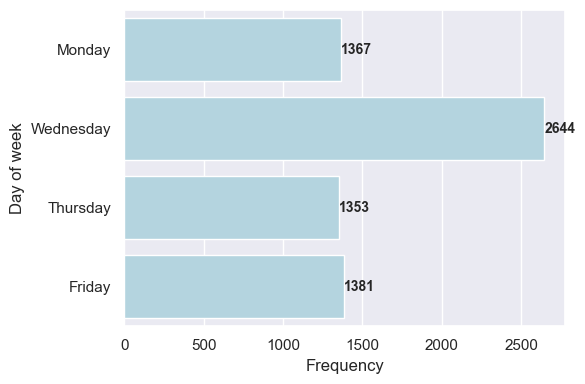

In [76]:
# Cách 2:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_uber, y = "request_day_of_week", color="lightblue");
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")
plt.xlabel("Frequency")
plt.ylabel("Day of week")
plt.tight_layout()
plt.show()

##  VẼ 1 LINE CHART ĐẾM SỐ LƯỢNG REQUEST THEO TỪNG KHUNG GIỜ?

In [77]:
df_uber["request_by_hour"] = df_uber["request_timestamp"].dt.hour

In [78]:
request_count = df_uber["request_by_hour"].value_counts()
request_count = request_count.sort_index()
print(request_count)

request_by_hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
Name: count, dtype: int64


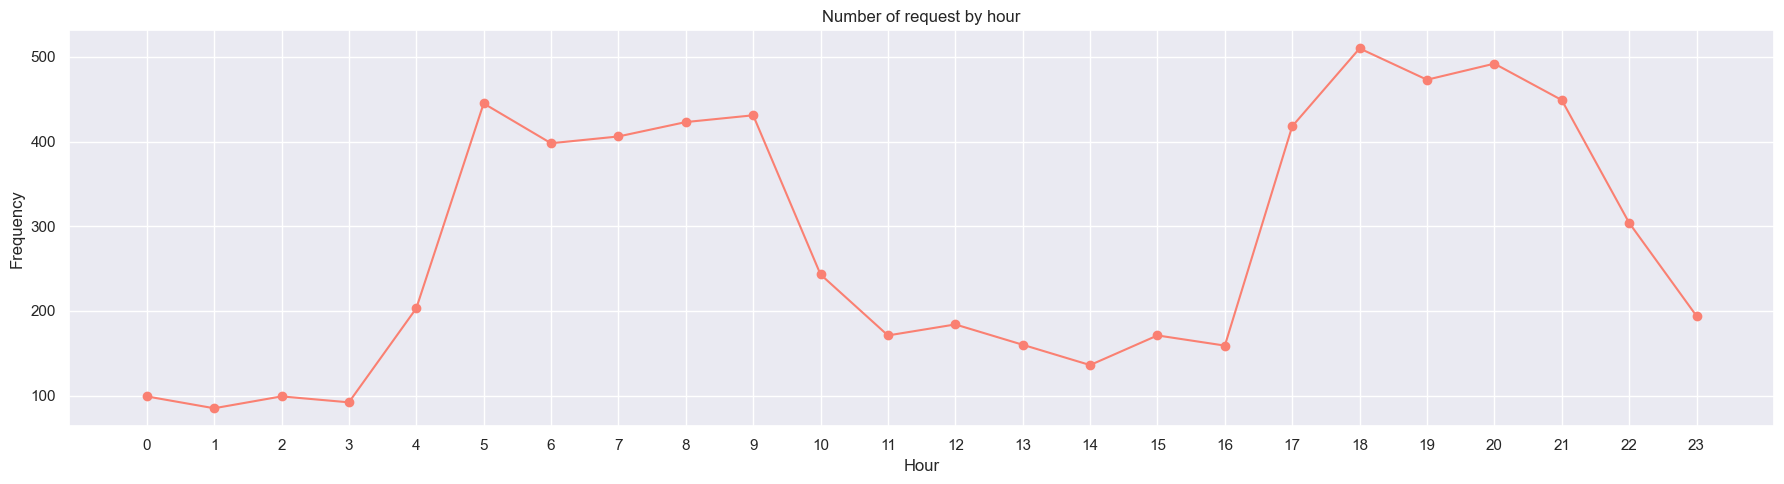

In [79]:
# Cách 1:
plt.figure(figsize=(18, 5))
line = plt.plot(request_count.index, request_count.values,  marker = "o", color = "salmon")
# for bar in bars:
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
#              str(int(bar.get_height())),
#              ha="center", va="bottom", fontsize=10, weight="bold")
plt.title(f"Number of request by hour")
plt.ylabel("Frequency")
plt.xlabel("Hour")
plt.xticks (range (0, 24))
plt.tight_layout()
plt.show()

In [80]:
df_req_by_hour = df_uber.groupby (by = "request_by_hour", as_index = False)\
    .agg (request_count = ("request_id", "nunique"))

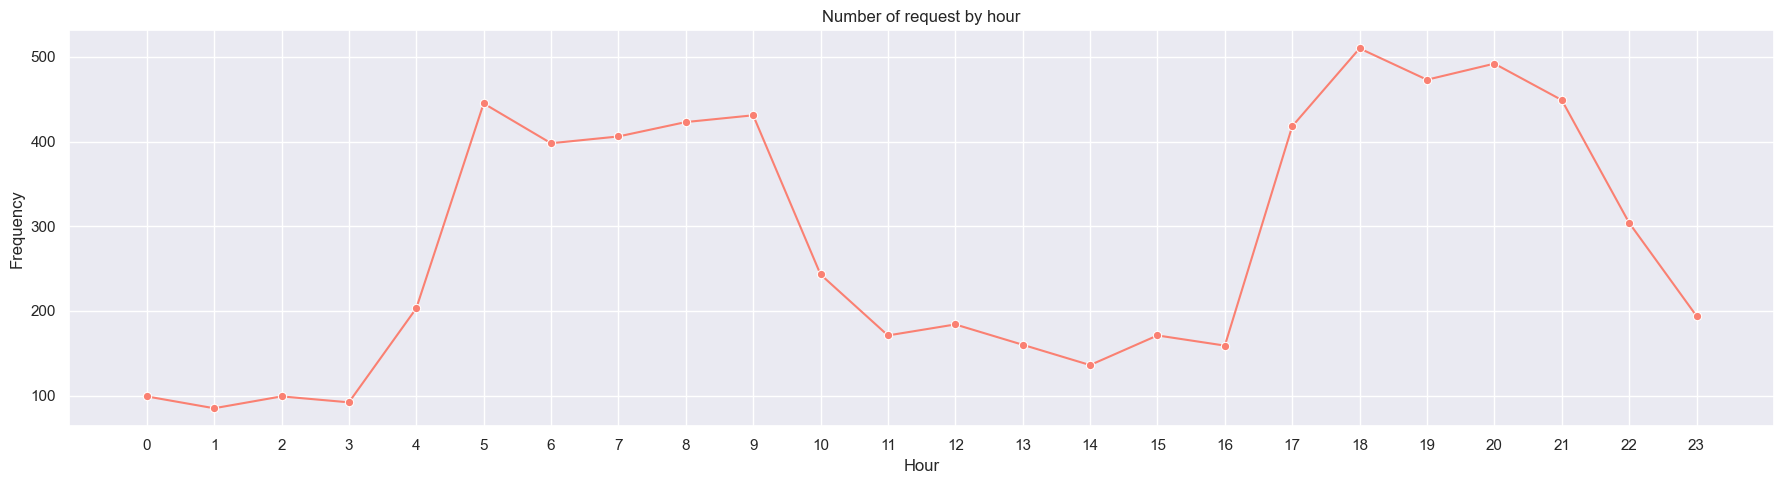

In [81]:
# Cách 2:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_req_by_hour, x = "request_by_hour", y = "request_count", color = 'salmon',
    marker = 'o')
# for bar in bars:
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
#              str(int(bar.get_height())),
#              ha="center", va="bottom", fontsize=10, weight="bold")
plt.title(f"Number of request by hour")
plt.ylabel("Frequency")
plt.xlabel("Hour")
plt.xticks (range (0, 24))
plt.tight_layout()
plt.show()

##  VẼ 1 HISTOGRAM CHART ĐẾM SỐ LƯỢNG REQUEST THEO TỪNG KHUNG GIỜ?

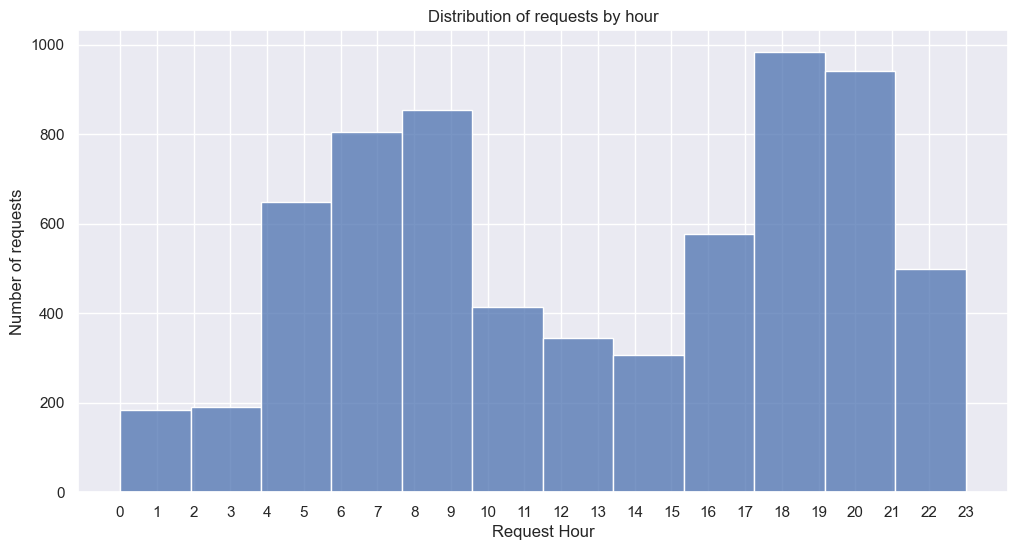

In [82]:
plt.figure(figsize = (12, 6))
sns.histplot (
    data = df_uber,
    x = 'request_by_hour',
    bins = 12
)
plt.title ('Distribution of requests by hour')
plt.xlabel ('Request Hour')
plt.ylabel ('Number of requests')
plt.xticks (range (0, 24))
plt.show()

*  VẼ 1 SCATTER CHART ĐẾM SỐ LƯỢNG REQUEST THEO TỪNG KHUNG GIỜ?

In [83]:
df_grby_hour = df_uber.groupby (by = "request_by_hour", as_index= False)\
    .agg (
        count_requests = ("request_id", "nunique"),
        count_drivers = ("driver_id", "nunique")
    )
df_grby_hour

,request_by_hour,count_requests,count_drivers
0,0,99,41
1,1,85,29
2,2,99,41
3,3,92,34
4,4,203,107
5,5,445,225
6,6,398,209
7,7,406,218
8,8,423,211
9,9,431,213


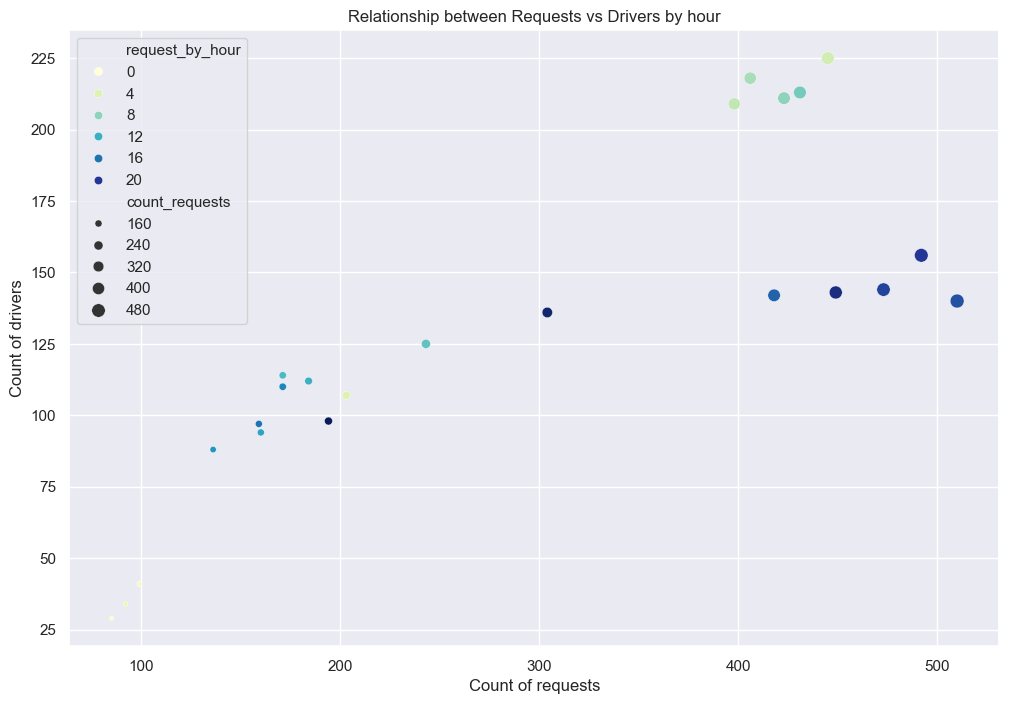

In [84]:
plt.figure (figsize = (12, 8))
sns.scatterplot (
    data = df_grby_hour,
    x = "count_requests",
    y = "count_drivers",
    hue = "request_by_hour",
    size = "count_requests",
    sizes = (10, 100),
    palette= "YlGnBu"
)
plt.xlabel ("Count of requests")
plt.ylabel ("Count of drivers")
plt.title ("Relationship between Requests vs Drivers by hour")
plt.show()

##  VẼ 1 HEATMAP CHART THỂ HIỆN SỐ LƯỢNG REQ THEO TỪNG KHUNG GIỜ VÀ THEO CÁC NGÀY TRONG TUẦN?

In [85]:
df_uber

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_day_of_week,request_by_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,Friday,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,Friday,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,Friday,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,Friday,23


In [86]:
df_maxtrix = pd.crosstab(
    df_uber["request_day_of_week"], df_uber["request_by_hour"]
).reindex(["Monday", "Wednesday", "Thursday", "Friday"])
df_maxtrix

request_by_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
request_day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,16,18,14,17,39,95,87,76,81,98,...,26,29,40,83,106,96,100,85,60,40
Wednesday,39,27,40,38,83,163,170,162,160,169,...,58,71,58,172,185,188,180,188,125,75
Thursday,23,21,24,18,44,91,75,75,97,88,...,16,32,27,90,112,104,106,91,44,29
Friday,21,19,21,19,37,96,66,93,85,76,...,36,39,34,73,107,85,106,85,75,50


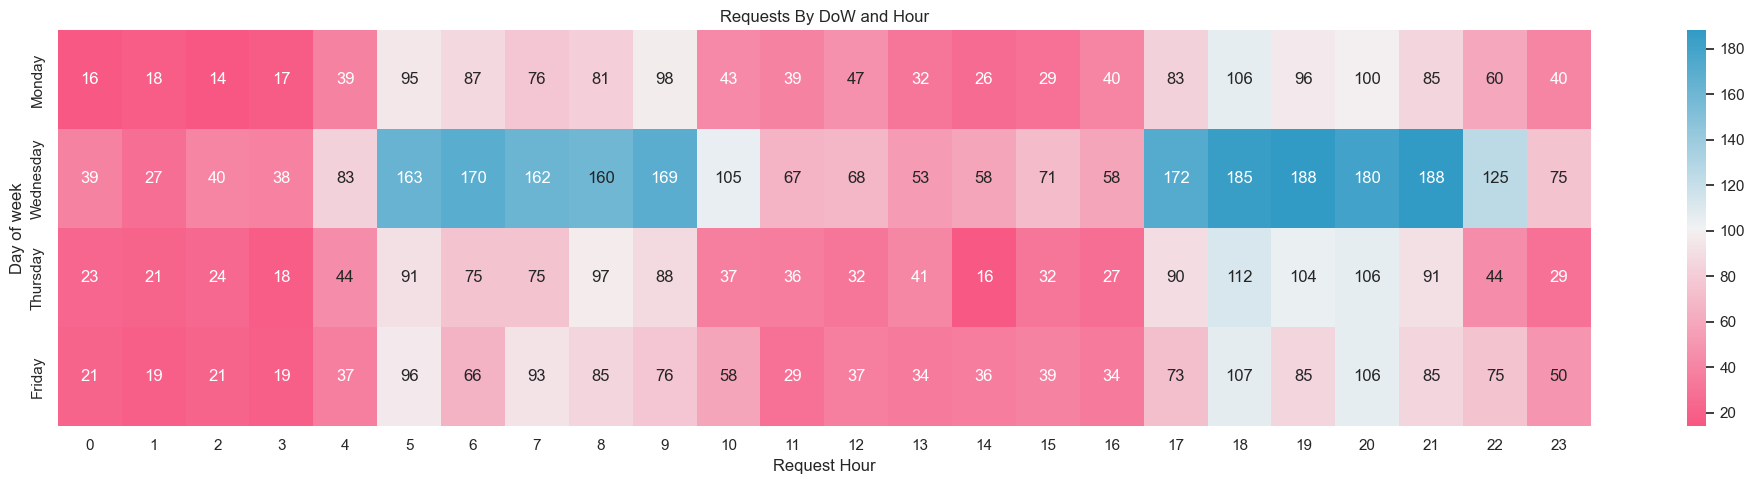

In [87]:
plt.figure (figsize = (20, 5))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(data=df_maxtrix, cmap=cmap, fmt="g", annot=True)
plt.xlabel ("Request Hour")
plt.ylabel ("Day of week")
plt.title ("Requests By DoW and Hour")
plt.tight_layout()
plt.show()

In [88]:
df_uber["status"].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

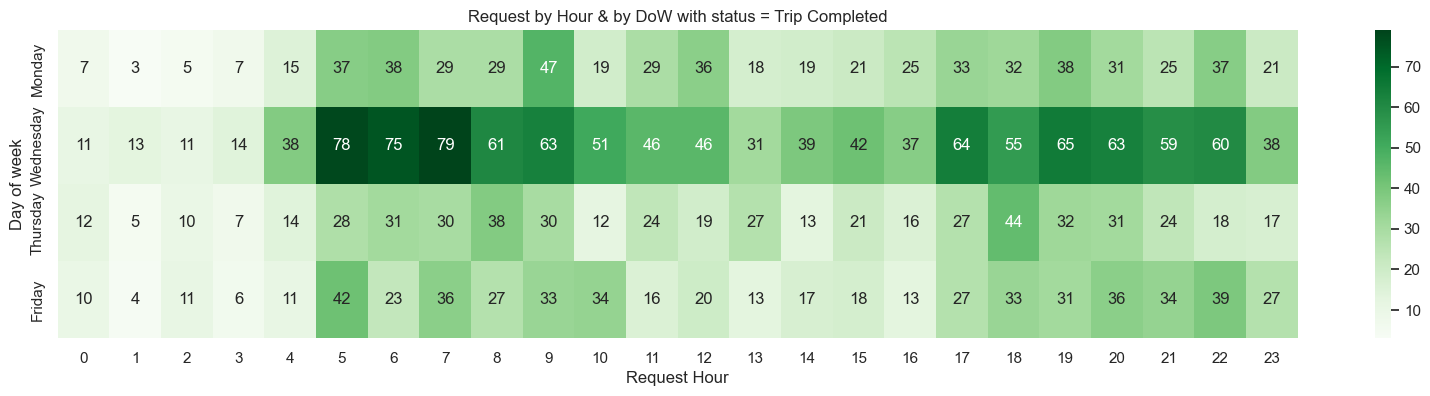

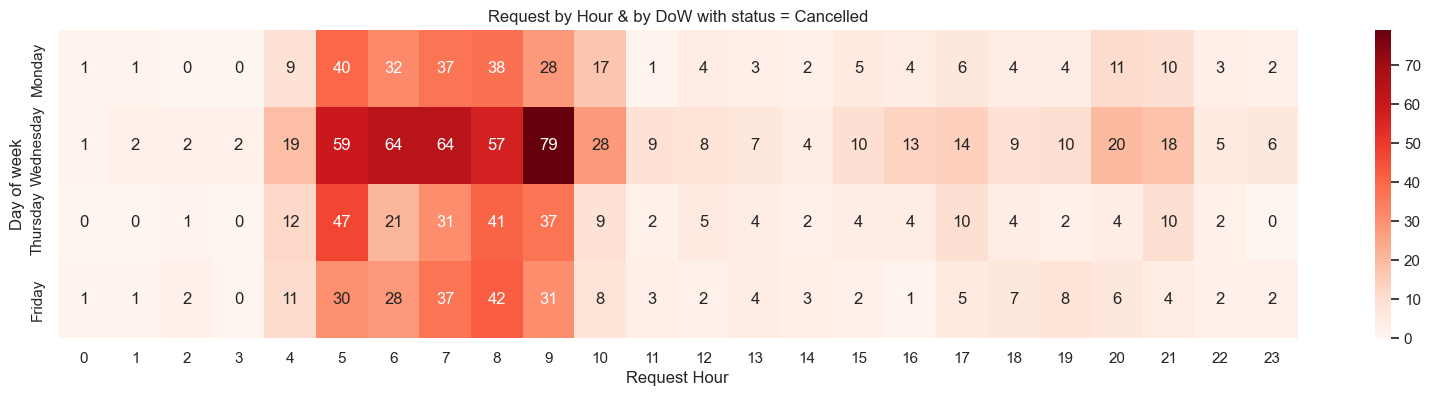

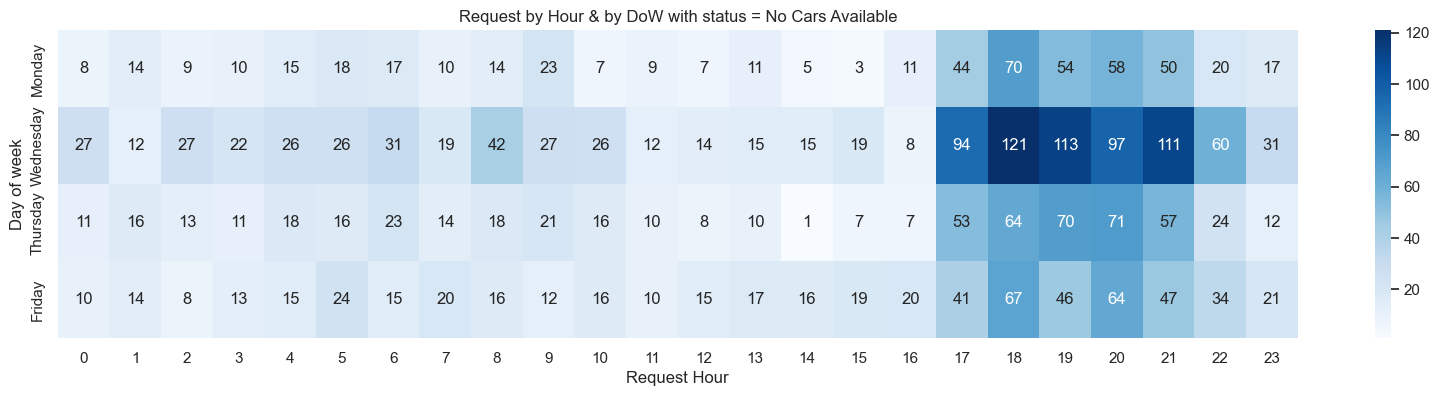

In [89]:
list_status = df_uber["status"].unique()
colors = ["Greens", "Reds", "Blues"]
for j, i in enumerate (list_status): # Duyệt qua và lấy luôn index + value
    df_status = df_uber[df_uber["status"] == i] # cắt nhỏ data df dựa trên status
    df_matrix = pd.crosstab (df_status["request_day_of_week"], df_status["request_by_hour"]).reindex (["Monday", "Wednesday", "Thursday", "Friday"])
    plt.figure (figsize = (20, 4))
    sns.heatmap (
        data = df_matrix,
        cmap = colors[j], # thay đổi dải màu dựa theo colors tương ứng
        fmt = "g",
        annot = True   # cho phép viết giá trị lên từng ô value
    )
    plt.xlabel ("Request Hour")
    plt.ylabel ("Day of week")
    plt.title (f"Request by Hour & by DoW with status = {i}")
    plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [90]:
df = pd.read_csv("Supermart_Grocery_Sales_Retail_Analytics_Dataset.csv")
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [91]:
# Chuyển về date time và ép kiểu cho cùng format
df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")

In [92]:
new_cols = []
for col in df.columns:
    new_cols.append(col.lower().replace(" ", "_"))
df.columns = new_cols

In [93]:
df

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu


In [94]:
# Display information about the DataFrames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   customer_name  9994 non-null   object        
 2   category       9994 non-null   object        
 3   sub_category   9994 non-null   object        
 4   city           9994 non-null   object        
 5   order_date     9994 non-null   datetime64[ns]
 6   region         9994 non-null   object        
 7   sales          9994 non-null   int64         
 8   discount       9994 non-null   float64       
 9   profit         9994 non-null   float64       
 10  state          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [95]:
print("Data describe for numerical feature:")
cm = sns.light_palette("blue", as_cmap=True)
df.drop(columns="order_date", axis=1).describe().T.style.background_gradient(cmap=cm)

Data describe for numerical feature:


,count,mean,std,min,25%,50%,75%,max
sales,9994.000000,1496.596158,577.559036,500.000000,1000.000000,1498.000000,1994.750000,2500.000000
discount,9994.000000,0.226817,0.074636,0.100000,0.160000,0.230000,0.290000,0.350000
profit,9994.000000,374.937082,239.932881,25.250000,180.022500,320.780000,525.627500,1120.950000


In [96]:
print("Data describe for categorical feature:")
df.describe(include=["object"]).T

Data describe for categorical feature:


,count,unique,top,freq
order_id,9994,9994,OD9994,1
customer_name,9994,50,Amrish,227
category,9994,7,Snacks,1514
sub_category,9994,23,Health Drinks,719
city,9994,24,Kanyakumari,459
region,9994,5,West,3203
state,9994,1,Tamil Nadu,9994


## Vẽ biểu đồ đường thể hiện doanh số theo các tháng?

In [97]:
df["month"] = df["order_date"].dt.month

In [98]:
df_monthly_sales = df.groupby (by = "month", as_index = False)\
    .agg (total_sales_by_month = ("sales", "sum"))

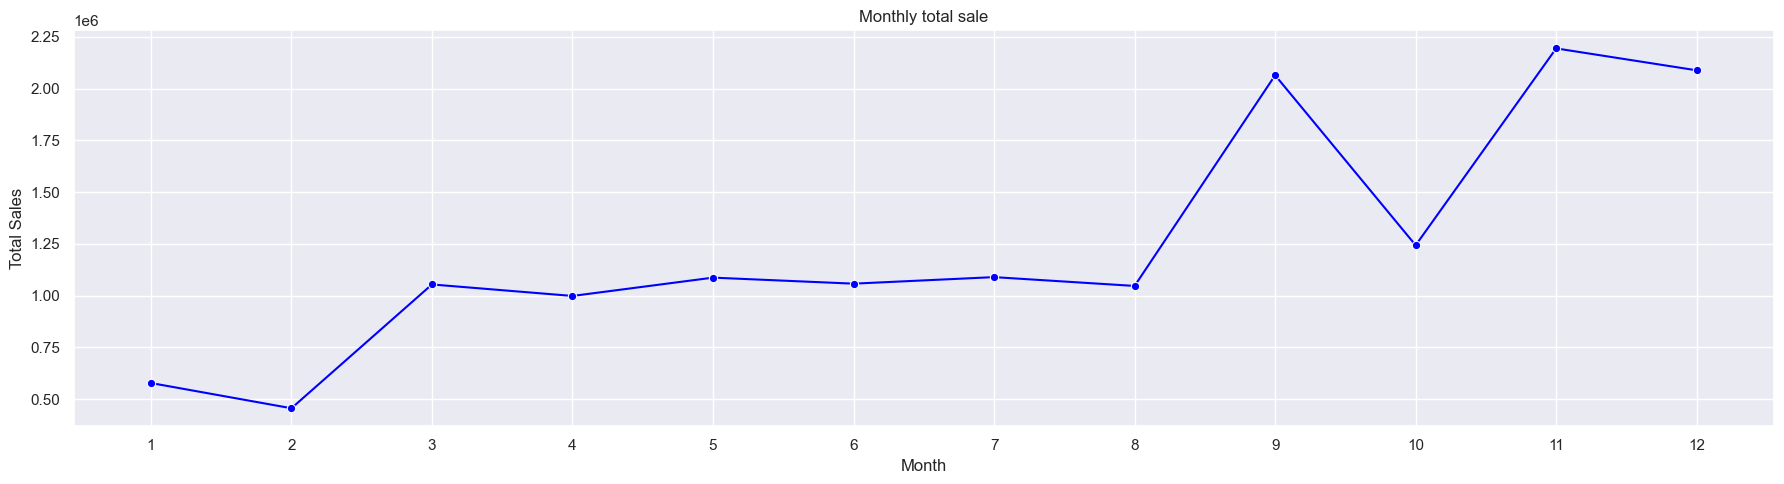

In [99]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_monthly_sales, x = "month", y = "total_sales_by_month", color = 'blue',
    marker = "o")

plt.title(f"Monthly total sale")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks (range (1, 13))
plt.tight_layout()
plt.show()

## Vẽ biểu đồ thể hiện tổng lợi nhuận theo từng category sản phâm?

In [100]:
df["category"].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [101]:
df_profit_by_category = df.groupby (by = "category", as_index = False)\
    .agg (profit_by_category = ("profit", "sum"))
df_profit_by_category

,category,profit_by_category
0,Bakery,528521.06
1,Beverages,525605.76
2,"Eggs, Meat & Fish",567357.22
3,Food Grains,529162.64
4,Fruits & Veggies,530400.38
5,Oil & Masala,497895.29
6,Snacks,568178.85


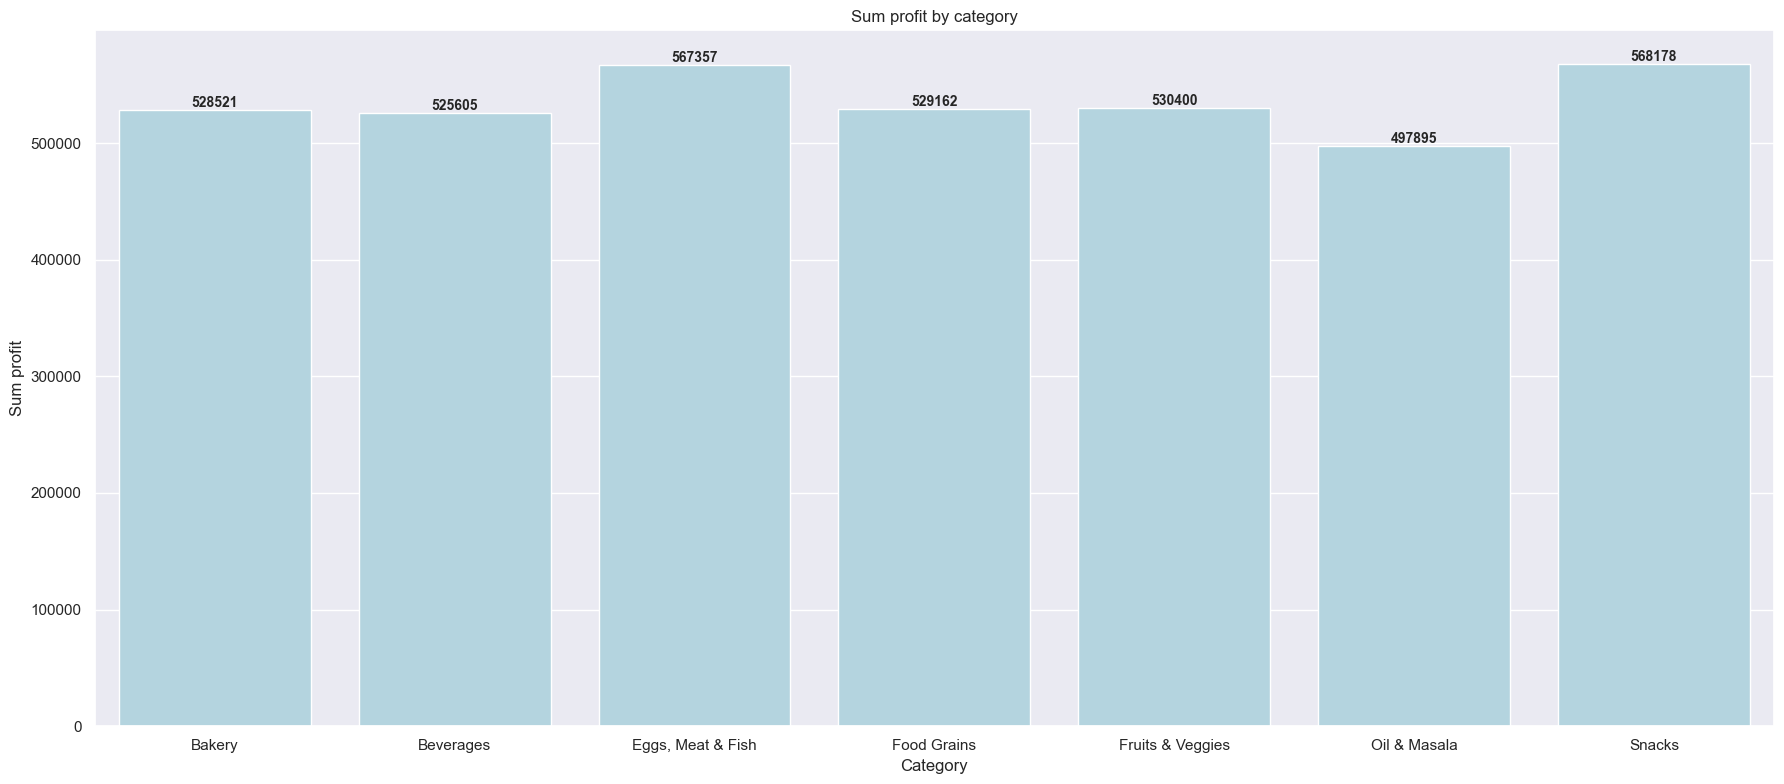

In [102]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=df_profit_by_category, x = "category", y = "profit_by_category", color = "lightblue")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")
plt.title(f"Sum profit by category")
plt.ylabel("Sum profit")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

In [103]:
def visualise_bar (label, value, df = df, show_value = False):
    plt.figure (figsize = (12, 6))
    ax = sns.barplot (
        data = df,
        y = label,
        x = value,
        errorbar = None
    )
    if show_value:
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")
    else:
        pass
    plt.title (f'{value} by product {label}')
    plt.show()

In [104]:
df_sale_by_category = df.groupby (by = "category", as_index = False)\
    .agg (sum_sale_by_category = ("sales", "sum"))
df_sale_by_category

,category,sum_sale_by_category
0,Bakery,2112281
1,Beverages,2085313
2,"Eggs, Meat & Fish",2267401
3,Food Grains,2115272
4,Fruits & Veggies,2100727
5,Oil & Masala,2038442
6,Snacks,2237546


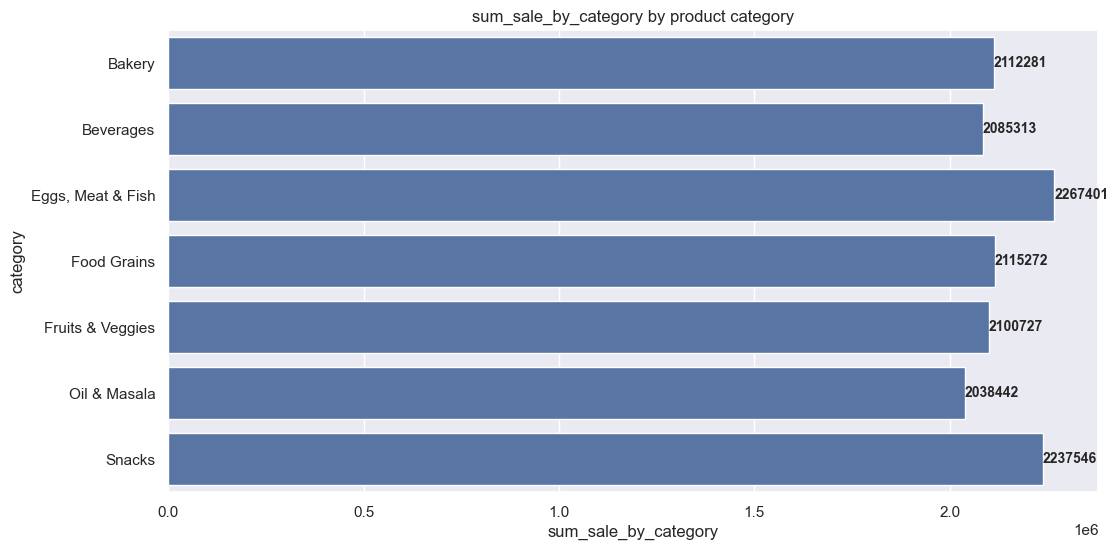

In [105]:
visualise_bar(label= "category", value = "sum_sale_by_category", df = df_sale_by_category, show_value = True)

## 📈 Vẽ biểu đồ đường doanh số theo quý/năm?

In [106]:
df["quarter"] = df["order_date"].dt.quarter
df.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,month,quarter
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,4
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,4
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,2
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,4
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,4


In [107]:
df_quarter_sales = df.groupby (by = "quarter", as_index = False)\
    .agg (total_sales_by_quarter = ("sales", "sum"))
df_quarter_sales

,quarter,total_sales_by_quarter
0,1,2088054
1,2,3143181
2,3,4200458
3,4,5525289


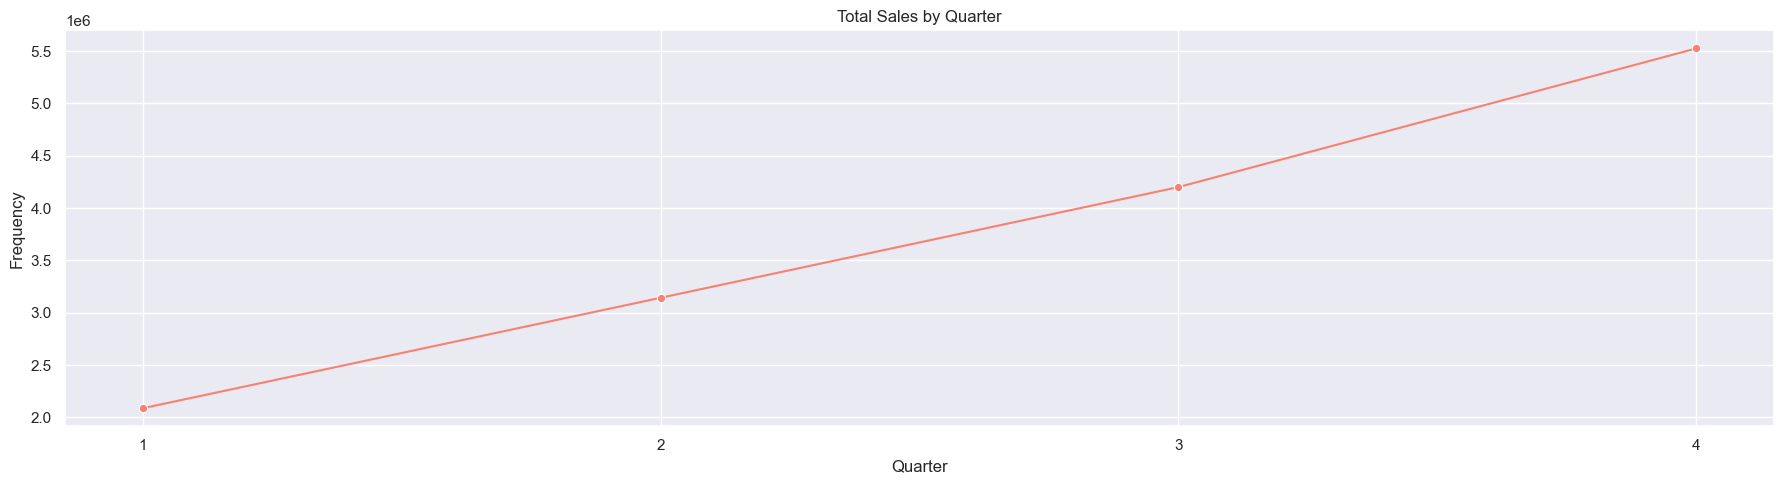

In [108]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_quarter_sales, x = "quarter", y = "total_sales_by_quarter", color = 'salmon',
    marker = "o")

plt.title(f"Total Sales by Quarter")
plt.ylabel("Frequency")
plt.xlabel("Quarter")
plt.xticks (range (1, 5))
plt.tight_layout()
plt.show()

In [109]:
df["year"] = df["order_date"].dt.year
df.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,month,quarter,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,4,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,4,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,2,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,4,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,4,2016


In [110]:
df_year_sales = df.groupby (by = "year", as_index = False)\
    .agg (total_sales_by_year = ("sales", "sum"))
df_year_sales

,year,total_sales_by_year
0,2015,2975599
1,2016,3131959
2,2017,3871912
3,2018,4977512


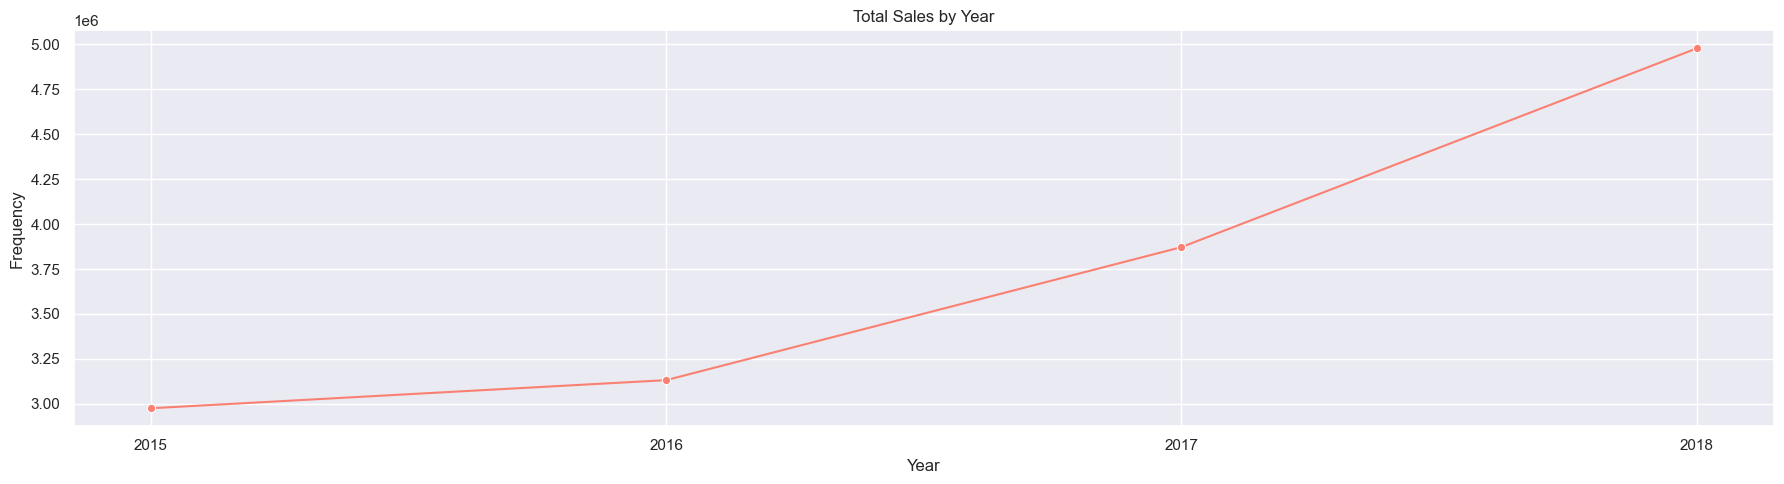

In [111]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_year_sales, x = "year", y = "total_sales_by_year", color = 'salmon',
    marker = "o")

plt.title(f"Total Sales by Year")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.xticks (range (2015, 2019))
plt.tight_layout()
plt.show()

**Insight:** <br>
Doanh số tăng rất mạnh theo quý và năm. Đặc biệt vào năm 2018 tăng rất nhiều.

### Giả sử muốn phân tích doanh số theo quý qua các năm thì làm sao?

In [112]:
df_year_quarter_sales = df.groupby (by = ["year", "quarter"], as_index = False)\
    .agg (total_sales_by_year_quarter = ("sales", "sum"))
df_year_quarter_sales

,year,quarter,total_sales_by_year_quarter
0,2015,1,435683
1,2015,2,573585
2,2015,3,833347
3,2015,4,1132984
4,2016,1,391996
5,2016,2,665382
6,2016,3,874977
7,2016,4,1199604
8,2017,1,503665
9,2017,2,871751


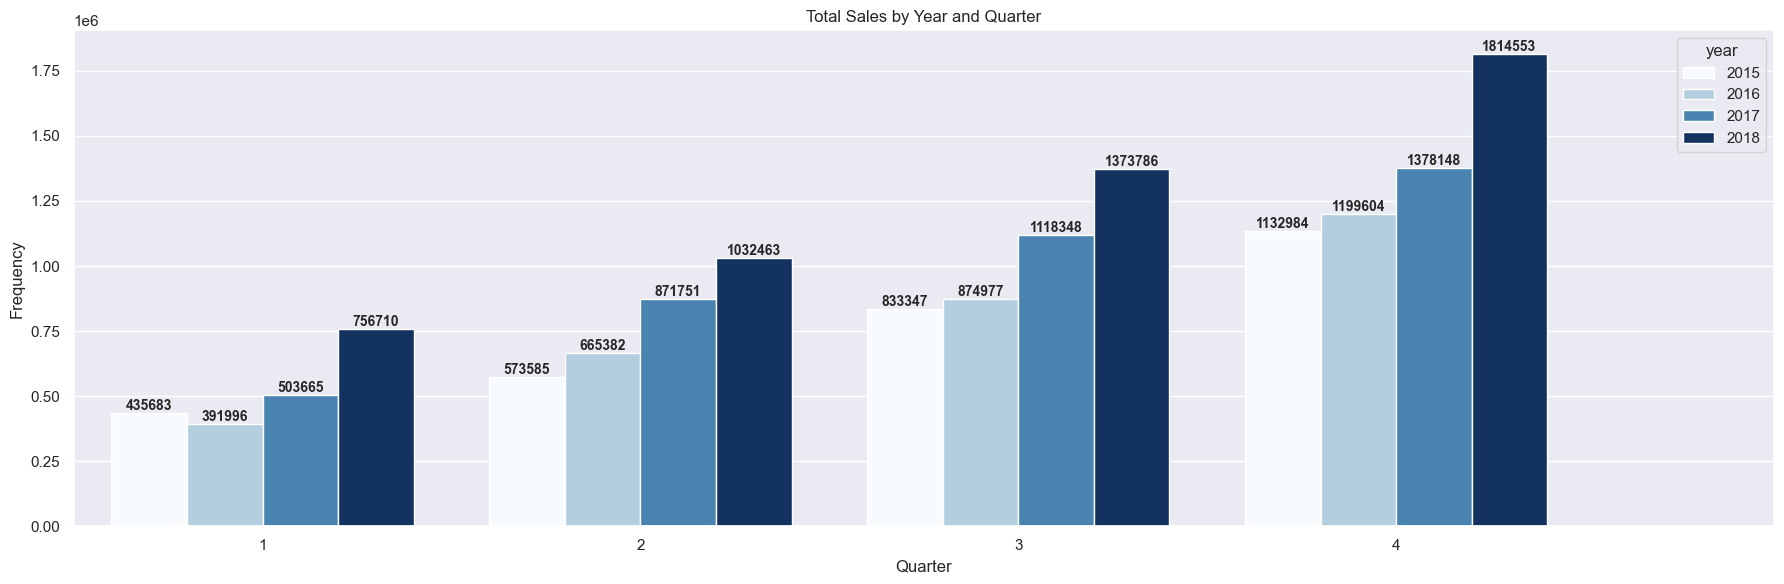

In [113]:
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=df_year_quarter_sales, x="quarter", y="total_sales_by_year_quarter", hue="year", palette="Blues");
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

plt.title(f"Total Sales by Year and Quarter")
plt.ylabel("Frequency")
plt.xlabel("Quarter")
plt.xticks (range (0, 5))
plt.tight_layout()
plt.show()

In [114]:
df

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,month,quarter,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,4,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,4,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,2,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,4,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,12,4,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,7,3,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,6,2,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,10,4,2018


## 📍 **Theo khu vực**
### 🗺️ Khu vực nào có **doanh số cao nhất/thấp nhất**?

In [115]:
df_region_sales = df.groupby (by = ["region"], as_index = False)\
    .agg (total_sales_by_region = ("sales", "sum"))
df_region_sales

,region,total_sales_by_region
0,Central,3468156
1,East,4248368
2,North,1254
3,South,2440461
4,West,4798743


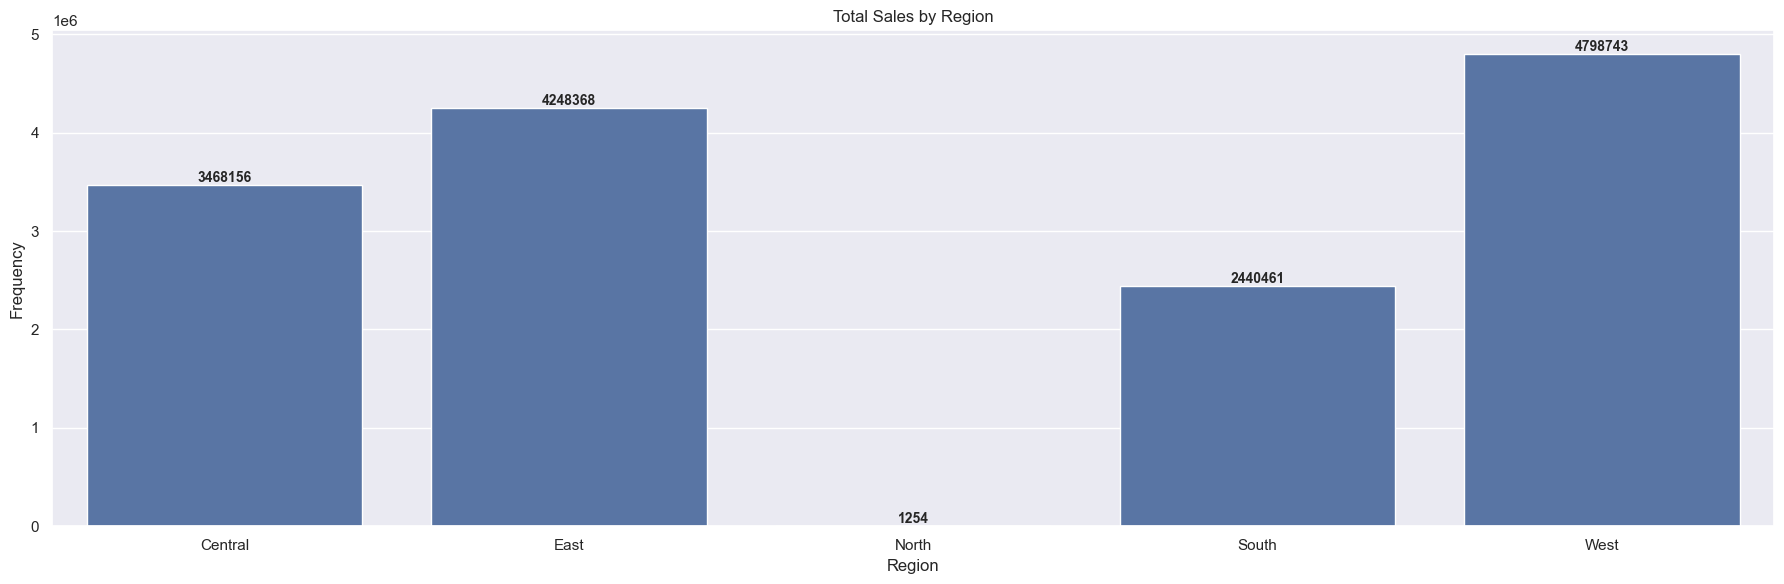

In [117]:
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=df_region_sales, x="region", y="total_sales_by_region");
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

plt.title(f"Total Sales by Region")
plt.ylabel("Frequency")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

### 📊 So sánh **tỷ lệ lãi gộp (%) theo khu vực**?

In [119]:
df["Gross_Margin_%"] = df["profit"] / df["sales"] * 100

In [120]:
df_mean_gross_margin_by_region  = df.groupby (by = ["region"], as_index = False)\
    .agg (mean_gross_margin_by_region = ("Gross_Margin_%", "mean"))
df_mean_gross_margin_by_region

,region,mean_gross_margin_by_region
0,Central,24.851055
1,East,25.218750
2,North,32.000000
3,South,25.295244
4,West,24.833281


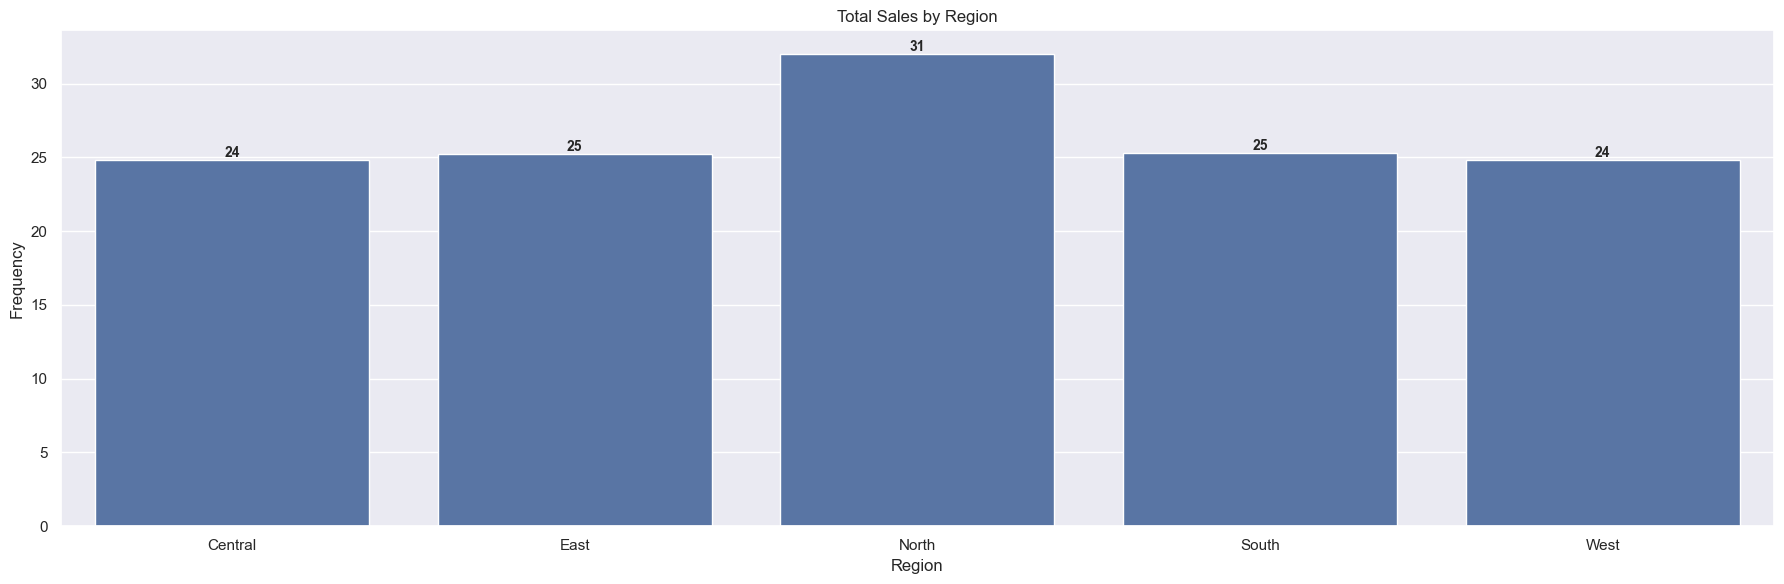

In [121]:
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=df_mean_gross_margin_by_region, x="region", y="mean_gross_margin_by_region");
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

plt.title(f"Total Sales by Region")
plt.ylabel("Frequency")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

## 💰 **Theo doanh số và lợi nhuận**
### 💸 Mặt hàng/doanh mục nào **đem lại nhiều doanh số nhất**?

In [122]:
df_sales_by_category = df.groupby (by = "category", as_index = False)\
    .agg (sales_by_category = ("sales", "sum"))
df_sales_by_category

,category,sales_by_category
0,Bakery,2112281
1,Beverages,2085313
2,"Eggs, Meat & Fish",2267401
3,Food Grains,2115272
4,Fruits & Veggies,2100727
5,Oil & Masala,2038442
6,Snacks,2237546


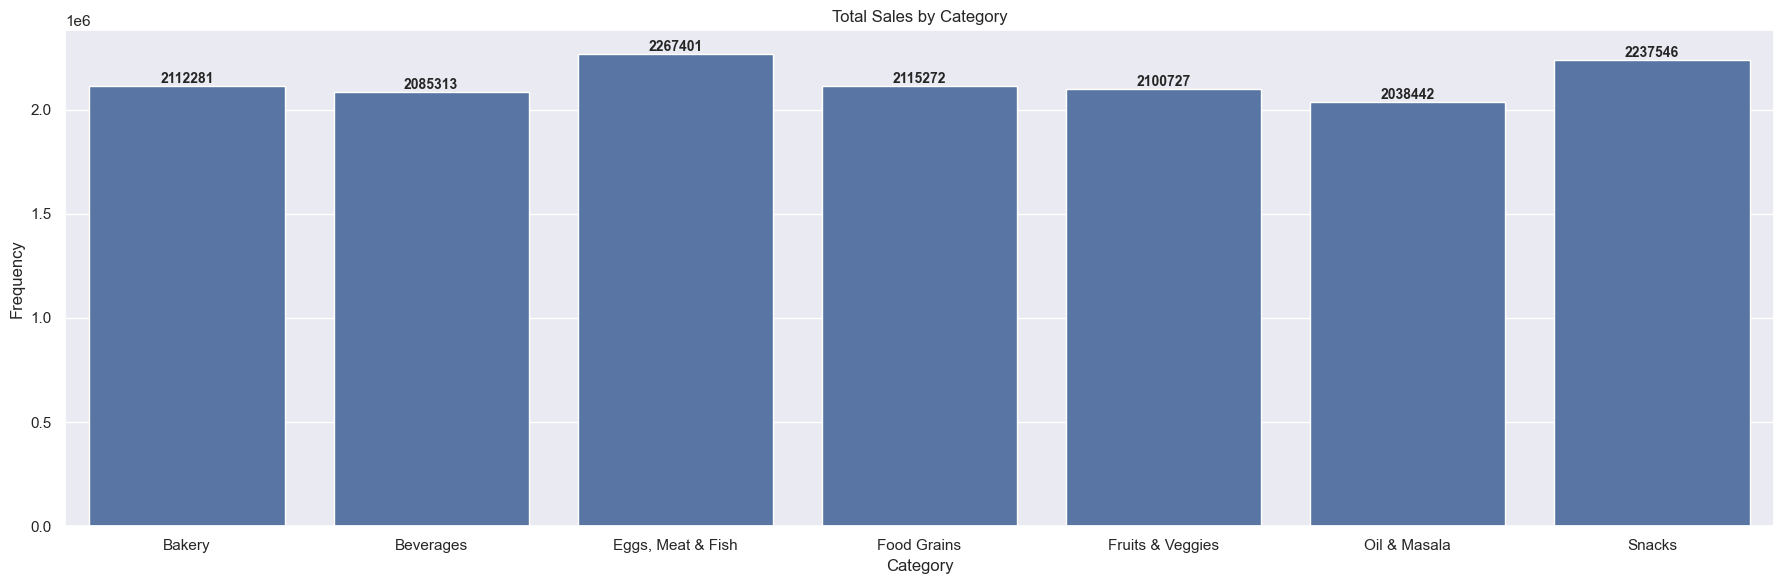

In [123]:
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=df_sales_by_category, x="category", y="sales_by_category");
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

plt.title(f"Total Sales by Category")
plt.ylabel("Frequency")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

### 📉 Có mặt hàng nào có **doanh số cao nhưng lợi nhuận thấp**?

In [135]:
df_sales_profit_by_category = df.groupby (by = "category", as_index = False)\
    .agg (sales_by_category = ("sales", "sum"),
          profit_by_category = ("profit", "sum")
        #   mean_gross_margin_by_category = ("Gross_Margin_%", "mean")
          )
df_sales_profit_by_category

,category,sales_by_category,profit_by_category
0,Bakery,2112281,528521.06
1,Beverages,2085313,525605.76
2,"Eggs, Meat & Fish",2267401,567357.22
3,Food Grains,2115272,529162.64
4,Fruits & Veggies,2100727,530400.38
5,Oil & Masala,2038442,497895.29
6,Snacks,2237546,568178.85


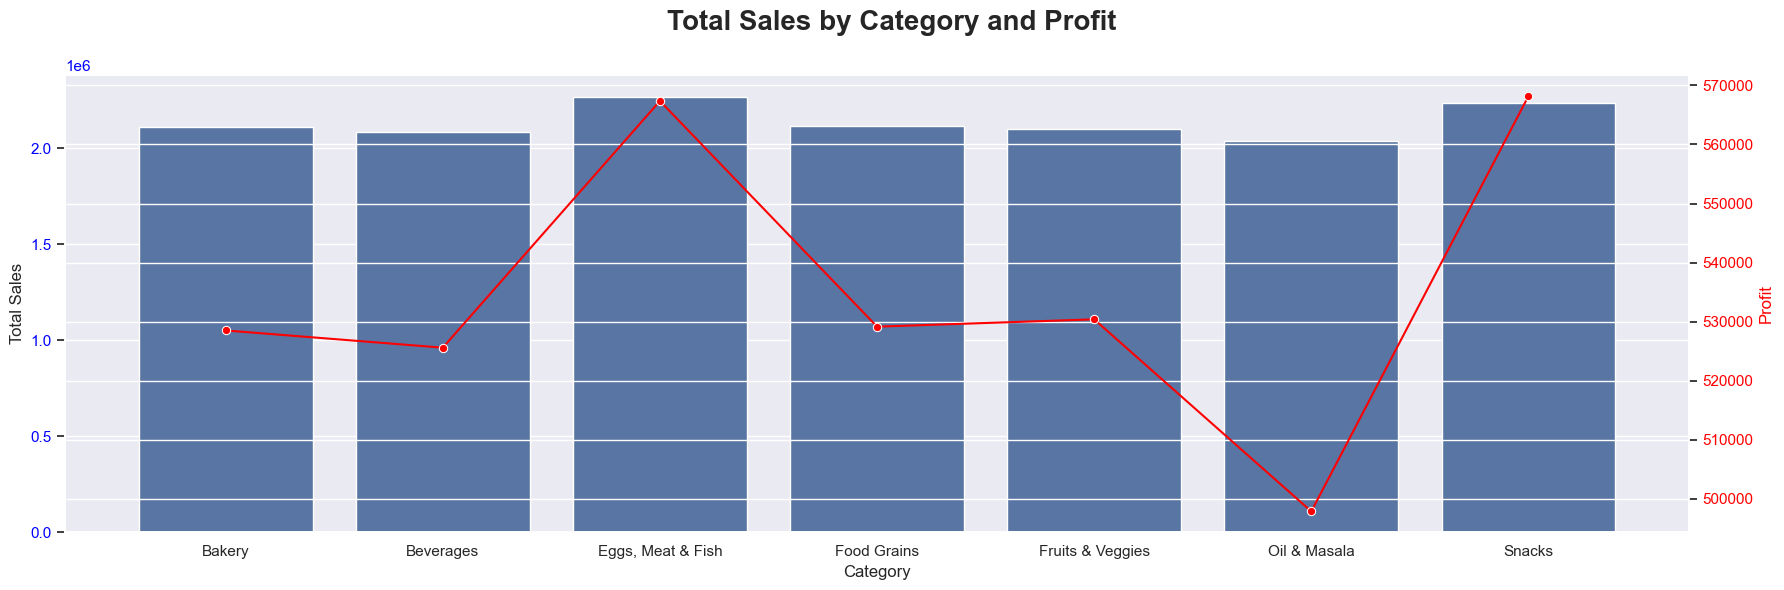

In [137]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax = sns.barplot(data=df_sales_profit_by_category, x="category", y="sales_by_category", ax=ax1);
# for container in ax.containers:
#     ax.bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax1.set_ylabel("Total Sales")
ax1.set_xlabel("Category")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
sns.lineplot(data=df_sales_profit_by_category, x="category", y="profit_by_category", ax=ax2, 
             color="red", marker="o")
ax2.set_ylabel("Profit", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# sns.lineplot(data=df_sales_profit_by_category, x='category', y="mean_gross_margin_by_category", ax=ax2, color='green', 
#              marker='D', label='Gross Margin %', linestyle='--')

plt.suptitle(f"Total Sales by Category and Profit", fontsize = 20, weight="bold")
plt.tight_layout()
plt.show()

### 🧾 **Tổng lợi nhuận theo từng danh mục sản phẩm**?

In [142]:
df_profit_by_category

,category,profit_by_category
0,Bakery,528521.06
1,Beverages,525605.76
2,"Eggs, Meat & Fish",567357.22
3,Food Grains,529162.64
4,Fruits & Veggies,530400.38
5,Oil & Masala,497895.29
6,Snacks,568178.85


### 🔍 Có đơn hàng nào bị lỗ (profit < 0) không? Bao nhiêu?

In [141]:
(df["profit"] < 0).sum()

np.int64(0)